# my5-vs-cygnus-builds
9/5/2023

Compare Cygnus to my5:
- Using new Naboo scripts
- Using multiple build configs (100M warmup + 200M sim):
    - cygnus
    - default
    - default_cygnuscore (default with Cygnus' core)

In [1]:
import os
import sys
sys.path.append(os.path.abspath("../../"))

from collections import defaultdict
import copy
from importlib import reload
import os

from matplotlib import colormaps
import pandas as pd
# from utils import plots, stats, tables, utils

from plot_utils import collate, plot

# Configuration

In [2]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/"
baseline_study = "stu_prefetchers"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
    "cloudsuite",
    "gap",
    "gap_real"
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 150

In [3]:
reload(collate)
studies = {
    "cygnus": collate.StudyCollator(
        os.path.join(sim_dir, "cygnus"), "stu_prefetchers", 
        baseline_study=baseline_study, 
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["pf_cygnus", "pf_my5"]),
    "default": collate.StudyCollator(
        os.path.join(sim_dir, "default"), "stu_prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["pf_cygnus", "pf_my5"]),
    "default_cygnuscore": collate.StudyCollator(
        os.path.join(sim_dir, "default_cygnuscore"), "stu_prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["pf_cygnus", "pf_my5"]),
    "cygnus_defaultcore": collate.StudyCollator(
        os.path.join(sim_dir, "cygnus_defaultcore"), "stu_prefetchers",
        baseline_study=baseline_study,
        baseline_experiment=baseline_experiment,
        weights_path=weights_path,
        experiments=["pf_cygnus", "pf_my5"]),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 984/984 [00:12<00:00, 79.93file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 3 experiments:
    Benchmarks : pr__citationCiteseer.mtx 649.fotonik3d bc__dblp-2010.mtx whiskey bwaves 627.cam4 merced bc__flickr.mtx bc__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx cc__coPapersCiteseer.mtx bc__sx-stackoverflow_C2A.mtx bc__web-Google.mtx bc__sx-stackoverflow.mtx delta bc__sx-stackoverflow_A2Q.mtx mcf bc__belgium_osm.mtx astar tc cc__wikipedia-20051105.mtx sphinx3 sssp cloud9 607.cactuBSSN bfs__com-Youtube.mtx pr__coAuthorsCiteseer.mtx bc__wiki-topcats.mtx pr__coPapersCiteseer.mtx pr__dblp-2010.mtx pr__luxembourg_osm.mtx bc__netherlands_osm.mtx cc__sx-stackoverflow_C2Q.mtx charlie bc__com-Youtube.mtx pr__flickr.mtx bc__citationCiteseer.mtx omnetpp lbm cc__web-Google.mtx classifcation cc__sx-stackoverflow.mtx bfs__coAuthorsDBLP.mtx pr__coAuthorsDBLP.mtx pr__amazon0601.mtx 623.xalancbmk bc__in-2004.mtx pr__soc-LiveJournal1.mtx bc__coAuthorsDBLP.mtx bfs__dblp-2010.mtx bfs__belgium_osm.mtx

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 363/363 [00:02<00:00, 154.86it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 3 experiments:
    Suites     : all cloudsuite spec17 spec06 gap_real gap google
    Experiments: pf_cygnus _baseline pf_my5
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 21/21 [00:01<00:00, 10.75it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 984/984 [00:10<00:00, 93.24file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 3 experiments:
    Benchmarks : pr__citationCiteseer.mtx 649.fotonik3d bc__dblp-2010.mtx whiskey bwaves 627.cam4 merced bc__flickr.mtx bc__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx cc__coPapersCiteseer.mtx bc__sx-stackoverflow_C2A.mtx bc__web-Google.mtx bc__sx-stackoverflow.mtx delta bc__sx-stackoverflow_A2Q.mtx mcf bc__belgium_osm.mtx astar tc cc__wikipedia-20051105.mtx sphinx3 sssp cloud9 607.cactuBSSN bfs__com-Youtube.mtx pr__coAuthorsCiteseer.mtx bc__wiki-topcats.mtx pr__coPapersCiteseer.mtx pr__dblp-2010.mtx pr__luxembourg_osm.mtx bc__netherlands_osm.mtx cc__sx-stackoverflow_C2Q.mtx charlie bc__com-Youtube.mtx pr__flickr.mtx bc__citationCiteseer.mtx omnetpp lbm cc__web-Google.mtx classifcation cc__sx-stackoverflow.mtx bfs__coAuthorsDBLP.mtx pr__coAuthorsDBLP.mtx pr__amazon0601.mtx 623.xalancbmk bc__in-2004.mtx pr__soc-LiveJournal1.mtx bc__coAuthorsDBLP.mtx bfs__dblp-2010.mtx bfs__belgium_osm.mtx

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 363/363 [00:02<00:00, 163.33it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 3 experiments:
    Suites     : all cloudsuite spec17 spec06 gap_real gap google
    Experiments: pf_cygnus _baseline pf_my5
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 21/21 [00:02<00:00,  9.74it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 984/984 [00:06<00:00, 146.16file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 3 experiments:
    Benchmarks : pr__citationCiteseer.mtx 649.fotonik3d bc__dblp-2010.mtx whiskey bwaves 627.cam4 merced bc__flickr.mtx bc__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx cc__coPapersCiteseer.mtx bc__sx-stackoverflow_C2A.mtx bc__web-Google.mtx bc__sx-stackoverflow.mtx delta bc__sx-stackoverflow_A2Q.mtx mcf bc__belgium_osm.mtx astar tc cc__wikipedia-20051105.mtx sphinx3 sssp cloud9 607.cactuBSSN bfs__com-Youtube.mtx pr__coAuthorsCiteseer.mtx bc__wiki-topcats.mtx pr__coPapersCiteseer.mtx pr__dblp-2010.mtx pr__luxembourg_osm.mtx bc__netherlands_osm.mtx cc__sx-stackoverflow_C2Q.mtx charlie bc__com-Youtube.mtx pr__flickr.mtx bc__citationCiteseer.mtx omnetpp lbm cc__web-Google.mtx classifcation cc__sx-stackoverflow.mtx bfs__coAuthorsDBLP.mtx pr__coAuthorsDBLP.mtx pr__amazon0601.mtx 623.xalancbmk bc__in-2004.mtx pr__soc-LiveJournal1.mtx bc__coAuthorsDBLP.mtx bfs__dblp-2010.mtx bfs__belgium_osm.mtx

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 363/363 [00:02<00:00, 167.13it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 3 experiments:
    Suites     : all cloudsuite spec17 spec06 gap_real gap google
    Experiments: pf_cygnus _baseline pf_my5
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 21/21 [00:02<00:00,  9.32it/s]
[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 984/984 [00:07<00:00, 140.19file/s]


[ipykernel_launcher][angrist-3] Generating benchmark stats for 121 benchmarks over 3 experiments:
    Benchmarks : pr__citationCiteseer.mtx 649.fotonik3d bc__dblp-2010.mtx whiskey bwaves 627.cam4 merced bc__flickr.mtx bc__coPapersCiteseer.mtx pr__sx-stackoverflow.mtx cc__coPapersCiteseer.mtx bc__sx-stackoverflow_C2A.mtx bc__web-Google.mtx bc__sx-stackoverflow.mtx delta bc__sx-stackoverflow_A2Q.mtx mcf bc__belgium_osm.mtx astar tc cc__wikipedia-20051105.mtx sphinx3 sssp cloud9 607.cactuBSSN bfs__com-Youtube.mtx pr__coAuthorsCiteseer.mtx bc__wiki-topcats.mtx pr__coPapersCiteseer.mtx pr__dblp-2010.mtx pr__luxembourg_osm.mtx bc__netherlands_osm.mtx cc__sx-stackoverflow_C2Q.mtx charlie bc__com-Youtube.mtx pr__flickr.mtx bc__citationCiteseer.mtx omnetpp lbm cc__web-Google.mtx classifcation cc__sx-stackoverflow.mtx bfs__coAuthorsDBLP.mtx pr__coAuthorsDBLP.mtx pr__amazon0601.mtx 623.xalancbmk bc__in-2004.mtx pr__soc-LiveJournal1.mtx bc__coAuthorsDBLP.mtx bfs__dblp-2010.mtx bfs__belgium_osm.mtx

[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 363/363 [00:02<00:00, 143.08it/s]


[ipykernel_launcher][angrist-3] Generating suite stats for 7 suites over 3 experiments:
    Suites     : all cloudsuite spec17 spec06 gap_real gap google
    Experiments: pf_cygnus _baseline pf_my5
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 21/21 [00:02<00:00,  8.74it/s]


# Dynamic degree

In [22]:
degreedyn_1core_df = {
    "Cygnus (cygnus)":             studies["cygnus"]["pf_cygnus"],
    "Cygnus (default)":            studies["default"]["pf_cygnus"],
    "Cygnus (default_cygnuscore)": studies["default_cygnuscore"]["pf_cygnus"],
    "Cygnus (cygnus_defaultcore)": studies["cygnus_defaultcore"]["pf_cygnus"],
    "my5 (cygnus)":                studies["cygnus"]["pf_my5"],
    "my5 (default)":               studies["default"]["pf_my5"],
    "my5 (default_cygnuscore)":    studies["default_cygnuscore"]["pf_my5"],
    "my5 (cygnus_defaultcore)":    studies["cygnus_defaultcore"]["pf_my5"],
}
degreedyn_1core_colors = defaultdict(lambda: None, {
    "Cygnus (cygnus)":             colormaps["Set3"](0),
    "Cygnus (default)":            colormaps["Set3"](0),
    "Cygnus (default_cygnuscore)": colormaps["Set3"](0),
    "Cygnus (cygnus_defaultcore)": colormaps["Set3"](0),
    "my5 (cygnus)":                colormaps["Set3"](9),
    "my5 (default)":               colormaps["Set3"](9),
    "my5 (default_cygnuscore)":    colormaps["Set3"](9),
    "my5 (cygnus_defaultcore)":    colormaps["Set3"](9),
})
degreedyn_1core_hatches = defaultdict(lambda: None, {
    "Cygnus (cygnus)":             None,
    "Cygnus (default)":            "/",
    "Cygnus (default_cygnuscore)": ".",
    "Cygnus (cygnus_defaultcore)": "-",
    "my5 (cygnus)":                None,
    "my5 (default)":               "/",
    "my5 (default_cygnuscore)":    ".",
    "my5 (cygnus_defaultcore)":    "-",
})
degreedyn_1core_legend_kwargs = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_legend_kwargs_wide = {
    "ncol": 2,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
degreedyn_1core_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

## IPC improvement

In [24]:
reload(plot)
plot.get_suite_table(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus (cygnus),44.15,23.72,8.17,28.26,13.95,23.036336
Cygnus (default),31.47,17.49,3.87,27.47,12.90,18.218086
Cygnus (default_cygnuscore),28.97,14.59,4.75,17.94,9.28,14.814900
Cygnus (cygnus_defaultcore),34.88,20.23,6.60,22.93,12.35,19.011715
my5 (cygnus),34.20,21.05,5.96,23.79,11.18,18.826772
my5 (default),32.40,19.48,6.40,23.13,11.83,18.306718
my5 (default_cygnuscore),25.77,14.28,3.81,15.34,8.28,13.256448
my5 (cygnus_defaultcore),29.05,17.71,5.52,18.57,9.76,15.841724


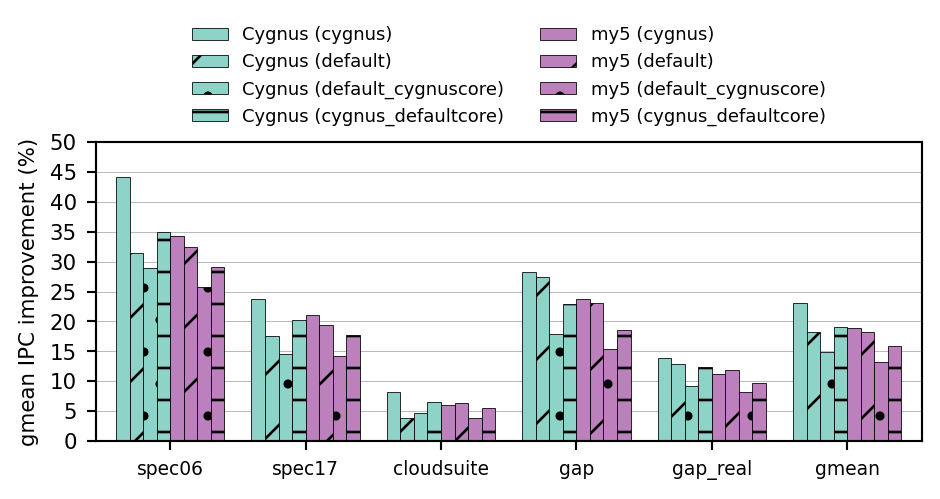

In [25]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cpu.gmean.ipc_improvement",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 50),
    ytick_distance=5,
    dpi=192, figsize=(5, 2.7))

### spec06

In [26]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore)
GemsFDTD,113.490000,55.760000,71.290000,61.540000,57.69000,63.630000,63.540000,41.170000
astar,7.410000,6.720000,5.400000,6.930000,1.72000,2.080000,1.350000,1.530000
bwaves,56.550000,116.950000,103.000000,43.020000,31.60000,62.510000,51.890000,27.370000
cactusADM,10.830000,50.420000,6.340000,23.170000,8.67000,41.690000,6.630000,18.630000
gcc,39.450000,28.690000,22.360000,38.930000,27.30000,25.320000,18.490000,26.810000
lbm,41.390000,15.970000,2.110000,46.210000,43.49000,14.040000,0.070000,47.640000
leslie3d,87.700000,43.680000,48.590000,33.070000,60.17000,43.150000,39.010000,27.560000
libquantum,110.310000,85.580000,81.850000,81.890000,112.88000,115.760000,95.460000,88.580000
mcf,29.870000,14.020000,13.550000,31.020000,25.46000,18.080000,17.580000,24.950000
milc,24.660000,1.840000,15.130000,13.650000,28.69000,19.480000,24.170000,19.700000


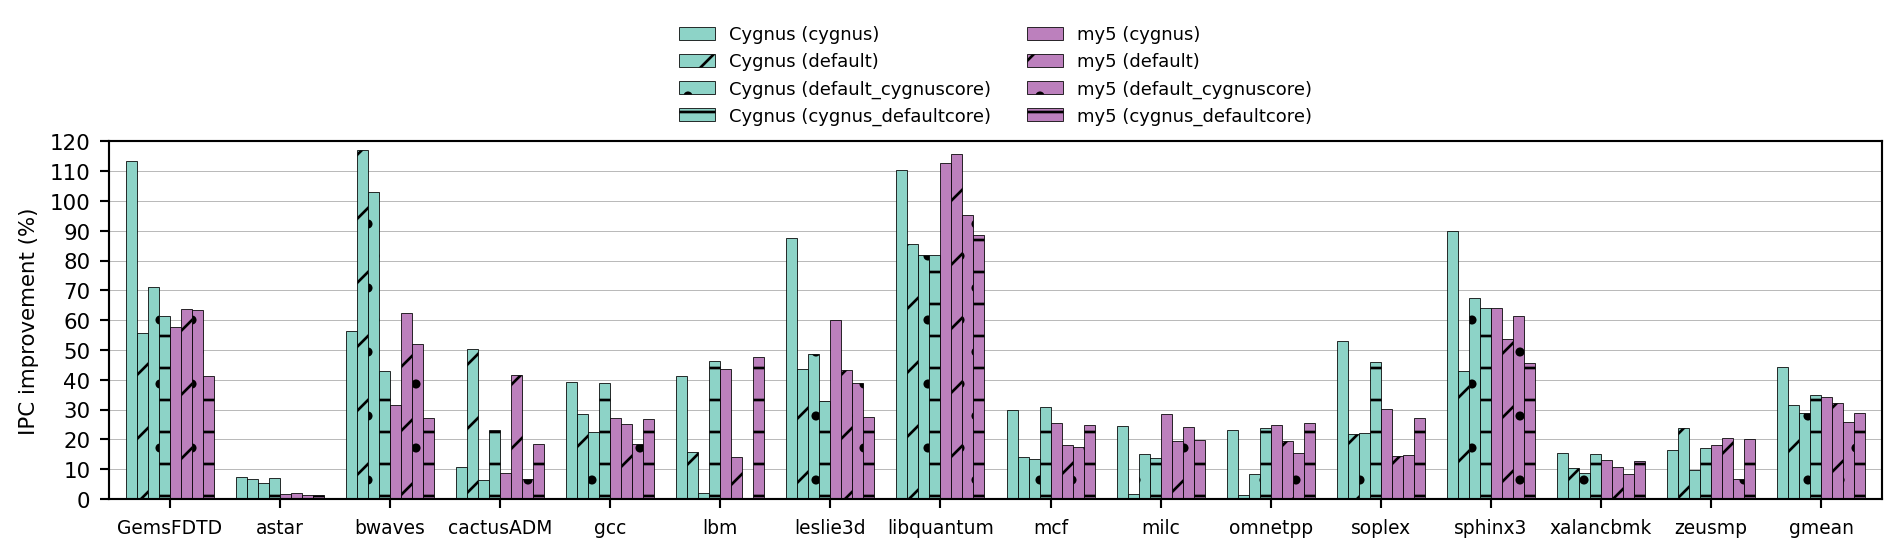

In [27]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))

### gap

In [28]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore)
bc,21.330000,13.360000,11.830000,14.600000,17.780000,11.890000,10.270000,11.330000
bfs,60.680000,85.710000,46.510000,63.960000,37.640000,59.550000,34.180000,39.200000
cc,38.820000,36.030000,21.660000,30.440000,38.750000,35.480000,21.370000,30.430000
pr,2.320000,1.830000,2.270000,0.920000,2.030000,1.300000,1.830000,0.590000
sssp,28.040000,11.600000,14.830000,8.900000,24.620000,7.710000,11.870000,6.420000
tc,25.540000,31.810000,14.980000,28.140000,25.790000,32.040000,15.080000,28.400000
gmean,28.256208,27.468543,17.941475,22.933579,23.785134,23.127684,15.338498,18.566501


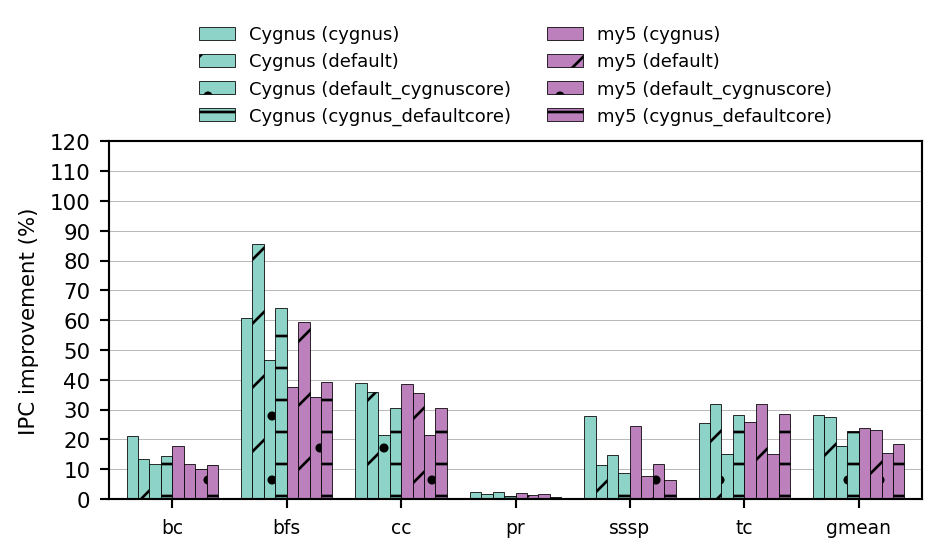

In [29]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "gap", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=degreedyn_1core_colors,
    hatches=degreedyn_1core_hatches,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 120),
    ytick_distance=10,
    dpi=192, figsize=(5, 3))
# import matplotlib.pyplot as plt
# plt.savefig("../../cvs/papers/micro-23r/figures/results_summary.pdf")

### gap_real

In [30]:
reload(plot)
pd.set_option("display.max_rows", 500)
plot.get_benchmark_table(
    degreedyn_1core_df, "gap_real", "cpu.gmean.ipc_improvement",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore)
bc__amazon-2008.mtx,9.760000,1.330000,4.680000,9.260000,3.230000,2.000000,2.410000,3.000000
bc__amazon0601.mtx,4.780000,-1.100000,1.530000,4.960000,1.980000,1.730000,1.460000,2.180000
bc__belgium_osm.mtx,4.520000,3.890000,3.180000,3.630000,3.110000,2.440000,2.560000,2.070000
bc__citationCiteseer.mtx,5.260000,-3.990000,-1.770000,4.770000,3.070000,2.950000,1.470000,2.740000
bc__coAuthorsCiteseer.mtx,10.800000,-0.810000,5.170000,10.080000,4.500000,2.420000,3.240000,4.090000
bc__coAuthorsDBLP.mtx,9.290000,-1.130000,3.710000,9.060000,4.130000,2.590000,2.850000,4.040000
bc__coPapersCiteseer.mtx,24.070000,11.990000,11.940000,17.670000,20.320000,14.010000,11.890000,14.980000
bc__coPapersDBLP.mtx,23.320000,8.960000,10.730000,17.350000,19.320000,13.300000,11.460000,14.900000
bc__com-Youtube.mtx,14.380000,-2.020000,2.540000,12.740000,7.450000,2.180000,3.120000,7.290000
bc__dblp-2010.mtx,15.030000,4.530000,9.000000,14.420000,5.870000,4.290000,4.270000,5.730000


## IPC

In [31]:
degreedyn_1core_df_plus_baseline = copy.copy(degreedyn_1core_df)
degreedyn_1core_df_plus_baseline["Baseline (cygnus)"] = studies["cygnus"]["_baseline"]
degreedyn_1core_df_plus_baseline["Baseline (default)"] = studies["default"]["_baseline"]
degreedyn_1core_df_plus_baseline["Baseline (default_cygnuscore)"] = studies["default_cygnuscore"]["_baseline"]
degreedyn_1core_df_plus_baseline["Baseline (cygnus_defaultcore)"] = studies["cygnus_defaultcore"]["_baseline"]

degreedyn_1core_colors_plus_baseline = copy.copy(degreedyn_1core_colors)
degreedyn_1core_colors_plus_baseline["Baseline (cygnus)"] = colormaps["Set3"](1)
degreedyn_1core_colors_plus_baseline["Baseline (default)"] = colormaps["Set3"](1)
degreedyn_1core_colors_plus_baseline["Baseline (default_cygnuscore)"] = colormaps["Set3"](1)
degreedyn_1core_colors_plus_baseline["Baseline (cygnus_defaultcore)"] = colormaps["Set3"](1)

degreedyn_1core_hatches_plus_baseline = copy.copy(degreedyn_1core_hatches)
degreedyn_1core_hatches_plus_baseline["Baseline (cygnus)"] = None
degreedyn_1core_hatches_plus_baseline["Baseline (default)"] = "/"
degreedyn_1core_hatches_plus_baseline["Baseline (default_cygnuscore)"] = "."
degreedyn_1core_hatches_plus_baseline["Baseline (cygnus_defaultcore)"] = "-"

degreedyn_1core_legend_kwargs_plus_baseline = copy.deepcopy(degreedyn_1core_legend_kwargs)
degreedyn_1core_legend_kwargs_plus_baseline["ncol"] = 3

reload(plot)
plot.get_suite_table(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites, add_mean=True)

,spec06,spec17,cloudsuite,gap,gap_real,gmean
Cygnus (cygnus),0.93,0.96,1.07,0.68,0.67,0.846729
Cygnus (default),0.59,0.81,1.35,0.70,0.67,0.787352
Cygnus (default_cygnuscore),0.80,0.86,1.05,0.73,0.70,0.819294
Cygnus (cygnus_defaultcore),1.05,1.18,1.61,0.72,0.74,1.012260
my5 (cygnus),0.87,0.94,1.05,0.65,0.66,0.818953
my5 (default),0.59,0.82,1.38,0.67,0.66,0.783489
my5 (default_cygnuscore),0.78,0.86,1.04,0.72,0.69,0.809024
my5 (cygnus_defaultcore),1.01,1.15,1.59,0.70,0.73,0.988479
Baseline (cygnus),0.65,0.77,0.99,0.53,0.59,0.688705
Baseline (default),0.45,0.69,1.30,0.55,0.59,0.665954


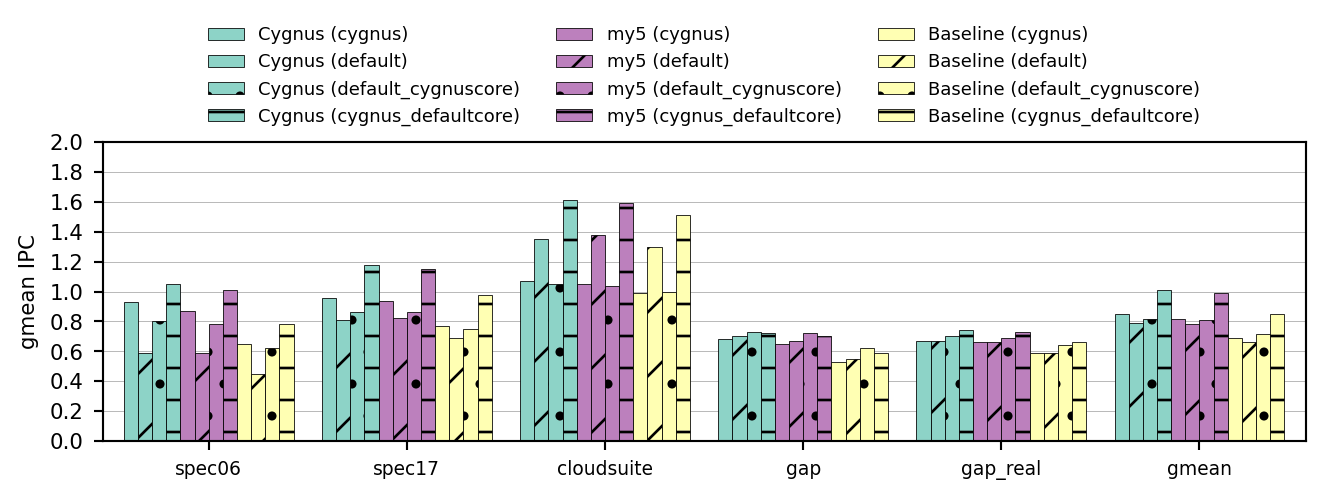

In [32]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df_plus_baseline, "cpu.gmean.ipc",
    suites=suites,
    add_mean=True,
    colors=degreedyn_1core_colors_plus_baseline,
    hatches=degreedyn_1core_hatches_plus_baseline,
    legend_kwargs=degreedyn_1core_legend_kwargs_plus_baseline,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="gmean IPC",
    ylim=(0, 2.0),
    ytick_distance=0.2,
    dpi=192, figsize=(7, 2.7))

### spec06

In [33]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore),Baseline (cygnus),Baseline (default),Baseline (default_cygnuscore),Baseline (cygnus_defaultcore)
GemsFDTD,1.230000,0.410000,0.760000,1.420000,0.910000,0.430000,0.730000,1.240000,0.580000,0.270000,0.440000,0.880000
astar,0.540000,0.420000,0.570000,0.470000,0.510000,0.400000,0.550000,0.450000,0.500000,0.400000,0.540000,0.440000
bwaves,1.460000,0.920000,1.280000,1.490000,1.230000,0.690000,0.960000,1.330000,0.930000,0.420000,0.630000,1.040000
cactusADM,0.980000,1.370000,0.810000,2.010000,0.970000,1.290000,0.810000,1.940000,0.890000,0.910000,0.760000,1.630000
gcc,0.910000,0.710000,0.880000,0.900000,0.830000,0.690000,0.860000,0.820000,0.650000,0.550000,0.720000,0.650000
lbm,1.390000,0.300000,0.600000,1.390000,1.410000,0.290000,0.590000,1.400000,0.980000,0.260000,0.590000,0.950000
leslie3d,1.460000,0.630000,1.020000,1.660000,1.250000,0.620000,0.950000,1.590000,0.780000,0.440000,0.680000,1.250000
libquantum,1.330000,0.760000,1.230000,1.260000,1.350000,0.890000,1.320000,1.310000,0.630000,0.410000,0.670000,0.690000
mcf,0.150000,0.080000,0.150000,0.150000,0.150000,0.080000,0.150000,0.140000,0.120000,0.070000,0.130000,0.120000
milc,1.070000,0.570000,0.990000,1.230000,1.110000,0.670000,1.070000,1.300000,0.860000,0.560000,0.860000,1.080000


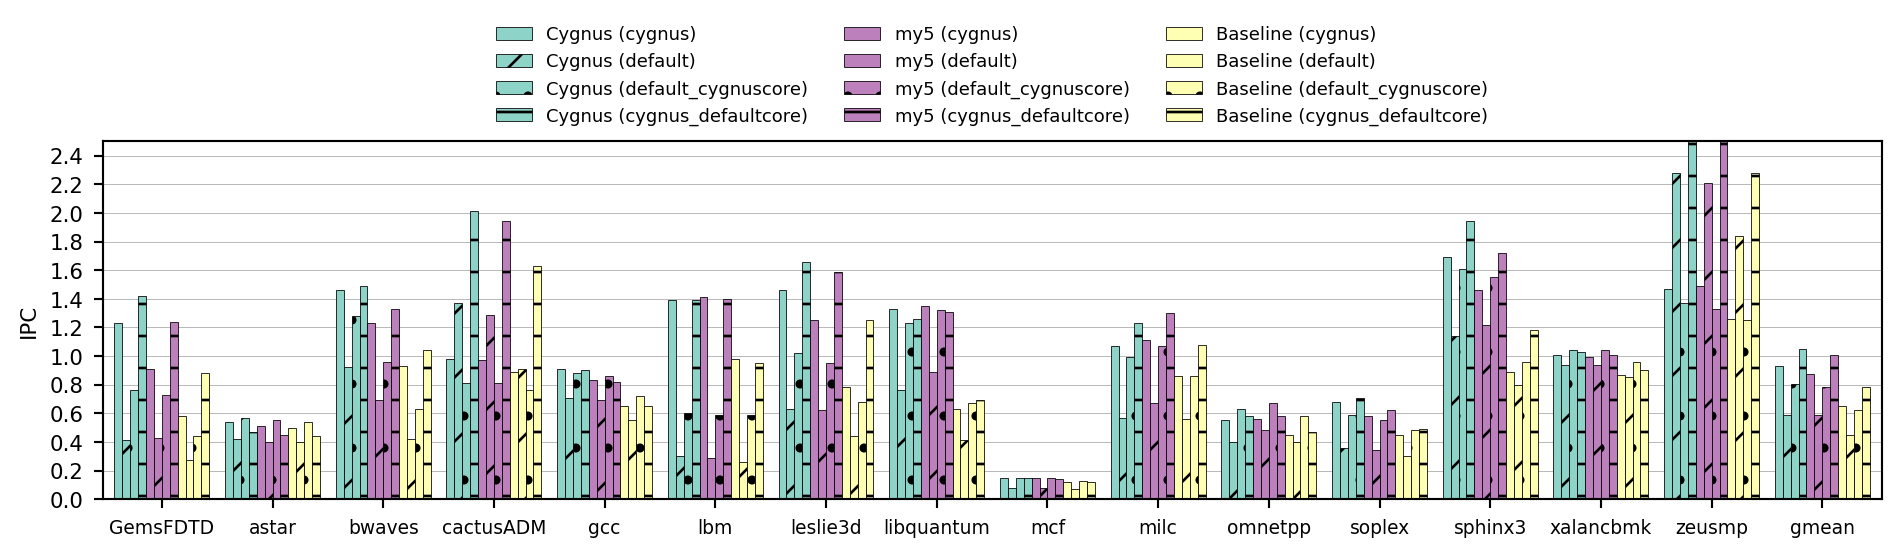

In [34]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df_plus_baseline, "spec06", "cpu.gmean.ipc",
    add_mean=True,
    colors=degreedyn_1core_colors_plus_baseline,
    hatches=degreedyn_1core_hatches_plus_baseline,
    legend_kwargs=degreedyn_1core_legend_kwargs_plus_baseline,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="IPC",
    ylim=(0, 2.5),
    ytick_distance=0.2,
    dpi=192, figsize=(10, 3))

## L2C accuracy

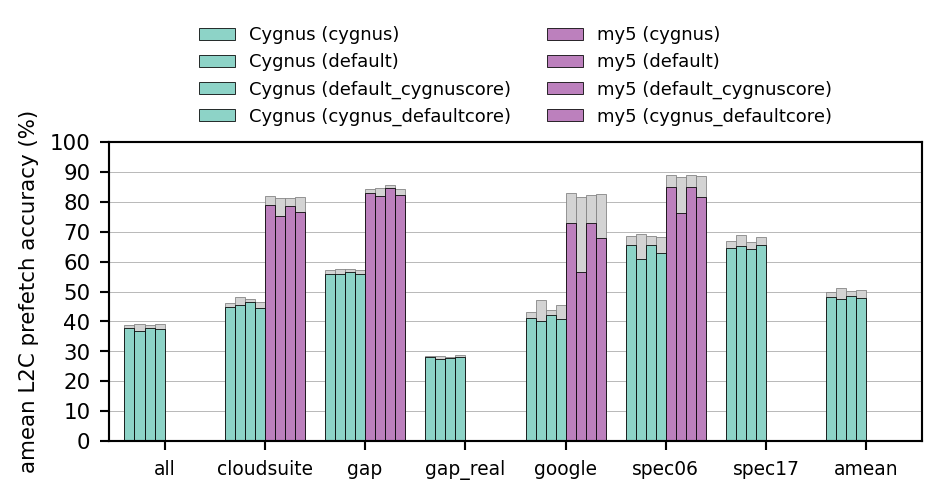

In [35]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="amean L2C prefetch accuracy (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [36]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_accuracy",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore)
GemsFDTD,83.510000,83.900000,82.78,84.400000,96.620000,96.370000,96.61,96.580000
astar,43.500000,44.930000,45.03,43.450000,79.430000,78.450000,79.18,78.600000
bwaves,98.950000,98.470000,98.55,98.950000,99.950000,99.900000,99.91,99.940000
cactusADM,99.540000,99.580000,99.58,99.540000,99.810000,99.790000,99.81,99.790000
gcc,33.950000,35.240000,34.69,33.280000,73.730000,73.200000,74.20,71.210000
lbm,99.910000,99.920000,99.92,99.910000,100.000000,100.000000,100.00,100.000000
leslie3d,93.890000,93.920000,93.99,93.750000,97.810000,97.360000,98.55,98.080000
libquantum,99.990000,99.990000,99.99,99.990000,100.000000,100.000000,100.00,100.000000
mcf,46.720000,47.820000,46.89,47.540000,85.740000,84.790000,85.12,85.120000
milc,57.110000,56.710000,55.27,57.090000,99.960000,99.940000,99.96,99.940000


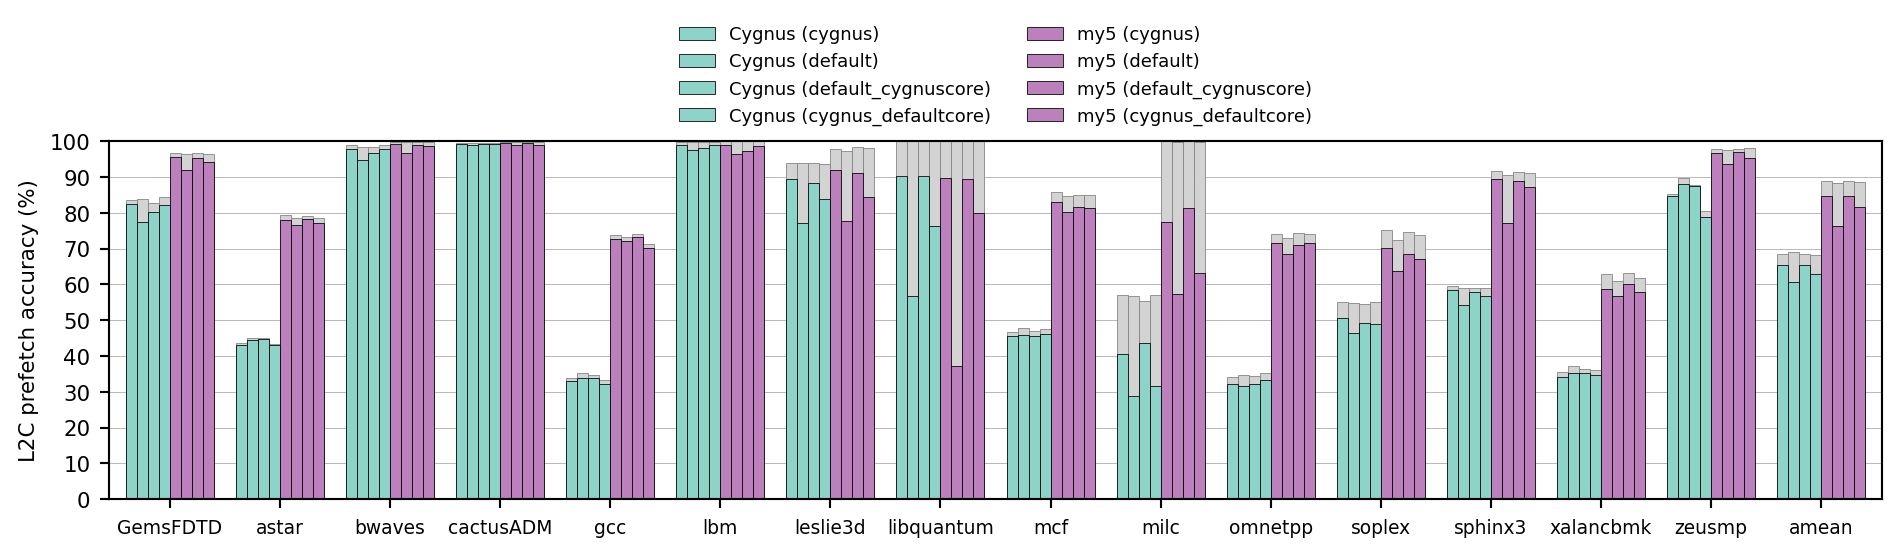

In [37]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_timely_accuracy",
    secondary_statistic_name="cache.L2C.amean.pf_accuracy",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="L2C prefetch accuracy (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))


## L2C coverage

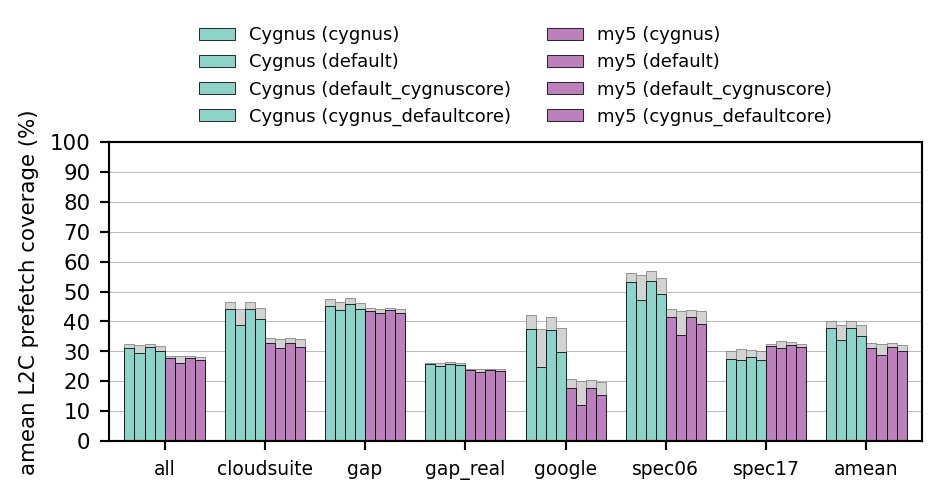

In [38]:
reload(plot)
plot.plot_suite_statistic(
    degreedyn_1core_df, "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="amean L2C prefetch coverage (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(5, 2.7))

### spec06

In [39]:
reload(plot)
plot.get_benchmark_table(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    add_mean=True).T

,Cygnus (cygnus),Cygnus (default),Cygnus (default_cygnuscore),Cygnus (cygnus_defaultcore),my5 (cygnus),my5 (default),my5 (default_cygnuscore),my5 (cygnus_defaultcore)
GemsFDTD,89.650000,80.21,87.100,87.060000,59.180000,65.300,62.130,64.130000
astar,14.550000,14.82,14.780,14.910000,13.820000,13.510,13.640,13.820000
bwaves,72.380000,66.19,71.480,68.490000,39.090000,30.080,37.490,32.720000
cactusADM,69.070000,68.12,68.920,67.910000,50.060000,42.600,50.730,46.480000
gcc,40.540000,38.94,41.030,39.860000,31.380000,31.010,31.540,31.260000
lbm,23.970000,23.68,23.820,23.920000,23.980000,23.580,23.720,23.890000
leslie3d,69.030000,56.77,67.830,63.300000,48.840000,46.070,49.290,46.960000
libquantum,87.150000,54.04,87.190,72.470000,81.760000,35.090,82.180,73.750000
mcf,29.010000,29.25,28.760,29.600000,27.580000,23.180,25.090,24.700000
milc,35.920000,26.18,39.590,27.900000,36.060000,26.880,37.990,28.580000


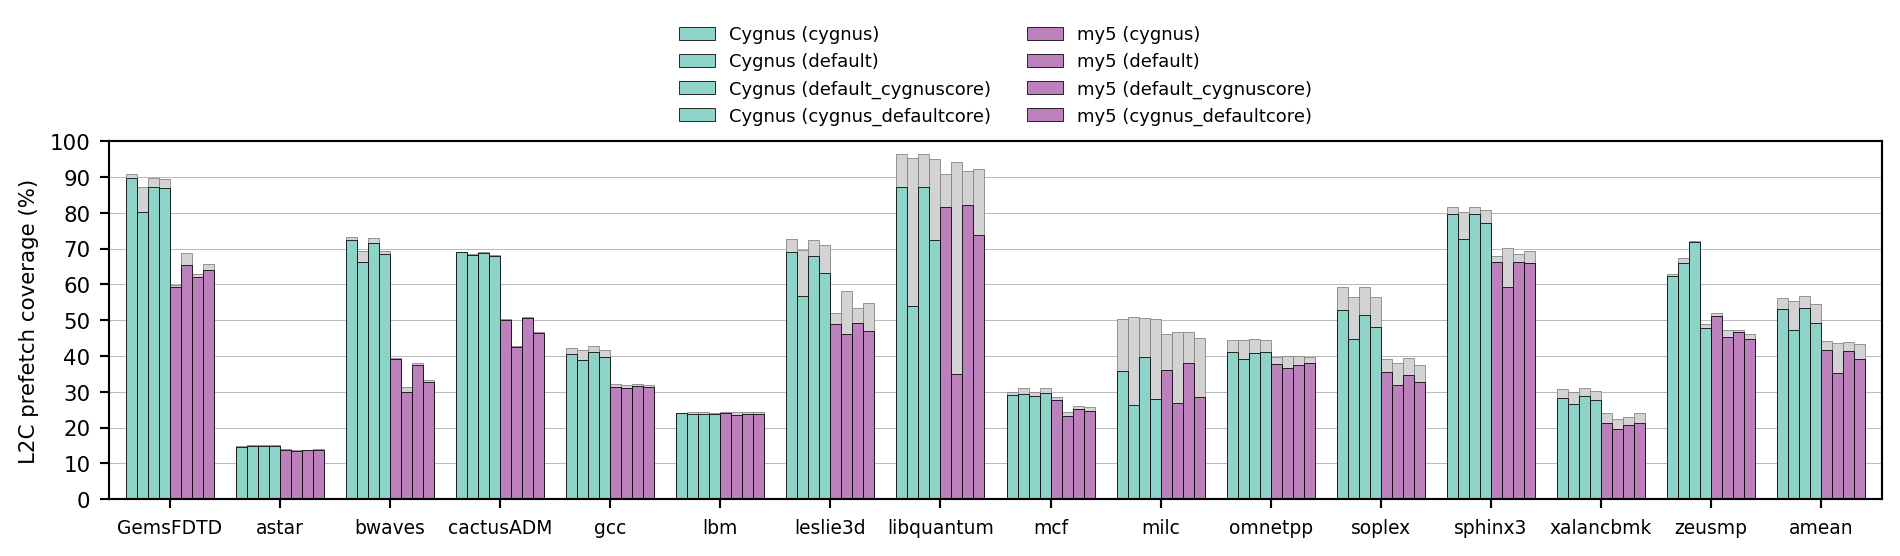

In [40]:
reload(plot)
plot.plot_benchmark_statistic(
    degreedyn_1core_df, "spec06", "cache.L2C.amean.pf_coverage",
    secondary_statistic_name="cache.L2C.amean.pf_untimely_coverage",
    add_mean=True,
    colors=degreedyn_1core_colors,
    legend_kwargs=degreedyn_1core_legend_kwargs,
    label_kwargs=degreedyn_1core_label_kwargs,
    add_suptitle=False,
    add_xlabel=False,
    ylabel="L2C prefetch coverage (%)",
    ylim=(0, 100),
    ytick_distance=10,
    dpi=192, figsize=(10, 3))